In [76]:

import pandas as pd 
from sklearn.svm import SVR 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,RandomTreesEmbedding, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [77]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP_1/Heart Failure Clinical Records.csv')

# Checking datatypes and null values

In [78]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [79]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [80]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# Time column is unneeded, so we will drop it

In [81]:
df.drop('time',inplace=True,axis=1)

### I did not realize it until it was too late, but dropping the time column actually destroyed my potential scores. In class, I turned that line off and all my scores improved significantly, but I did not discuss the scores after keeping the time column in the presentation and in my paper

# So Dr. Sarkar, if wanted, remove the time column or keep it

# Assigning X and Y variables

In [82]:
X = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

# Since we have an unbalanced y, we will stratify our y when splitting the data after scaling our X variable

In [83]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [84]:

scaler = StandardScaler()


X = scaler.fit_transform(X)

In [85]:
X_train, X_test,y_train,y_test = train_test_split(X,y, 
                                                  test_size =.20,
                                                  random_state=0, 
                                                  stratify=y)

# Creating the parameters for our models 

In [86]:
log_clf = LogisticRegression(solver='lbfgs',
                             multi_class='multinomial', 
                             max_iter = 10000)

rnd_clf = RandomForestClassifier(criterion='entropy',
                                 max_features='sqrt')


svm_clf= SVC(gamma='auto',probability = True, C=10,kernel = 'rbf')

dt_clf = DecisionTreeClassifier(criterion='gini',
                                splitter='best')

In [87]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Initializing the Voting Classifier

In [88]:
voting_clf = VotingClassifier( 
    estimators=[('lr',log_clf),
                ('rf',rnd_clf),
                ('sv',svm_clf),
                ('dt',dt_clf)],  
                voting = 'hard')


In [89]:
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.7833333333333333

In [90]:
#Testing to see if the model is overfitting, which it is


voting_clf.score(X_train,y_train)

0.9790794979079498

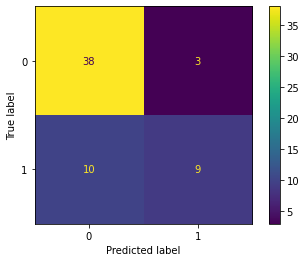

In [91]:
y_pred_vote = voting_clf.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_vote)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=voting_clf.classes_)
disp.plot()

plt.show()

# Initializing the Bagging Classifier, but using our voting ensemble as the model

In [92]:
bag_clf = BaggingClassifier(voting_clf, 
           n_estimators=500, 
           max_samples = .8, 
           oob_score=True,
           random_state=0)

In [ ]:
bag_clf.fit(X_train,y_train)

In [ ]:

bag_clf.score(X_train,y_train)

In [ ]:
bag_clf.score(X_test,y_test)

# Again, overfitting our data



In [ ]:
y_pred_bag = bag_clf.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=bag_clf.classes_)
disp.plot()

plt.show()

# Testing Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
grd_clf = GradientBoostingClassifier(n_estimators=50,
                                     learning_rate=1,
                                     random_state=0)
grd_clf.fit(X_train,y_train)
grd_clf.score(X_test,y_test)

In [ ]:
#Overfitting
grd_clf.score(X_train,y_train)

In [ ]:
y_pred_grd = grd_clf.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_grd)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=grd_clf.classes_)
disp.plot()

plt.show()

# Testing Ada Boosting Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=500, random_state=0, 
                             learning_rate=1)

ada_clf.fit(X_train,y_train)


In [ ]:
ada_clf.score(X_test,y_test)

In [ ]:
ada_clf.score(X_train,y_train)

In [ ]:
y_pred_ada = ada_clf.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=ada_clf.classes_)
disp.plot()

plt.show()

# Creating our report from our models we have used

In [ ]:
from numpy.core.arrayprint import format_float_scientific 
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

for clf in(log_clf,rnd_clf,svm_clf,voting_clf,ada_clf,grd_clf,bag_clf):
  clf.fit(X_train,y_train) 
  y_pred = clf.predict(X_test)
  clf_df = clf.__class__.__name__,accuracy_score(y_test,y_pred)
  print(clf_df)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse) 
  r2 = r2_score(y_test, y_pred)
  print("Results of sklearn.metrics:")
  print("MAE:",mae)
  print("MSE:", mse)
  print("RMSE:", rmse)
  print("R-Squared:", r2)
  print(classification_report(y_test,y_pred)) 